In [ ]:
#upload data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf
from math import *
import time
from sklearn.metrics import silhouette_samples, silhouette_score
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
from sklearn import metrics


In [ ]:
#supprimer les derniers lignes du data pour obtenir 59 noeuds
terrorism = pd.read_csv(r'/content/drive/MyDrive/PCD/data/Noordin-Top-Terrorist-Network-Data.csv')
terrorism.isnull().sum()
terrorism.drop('NAME', axis = 1, inplace = True)
i=78
while(i>58):
  terrorism=terrorism.drop([i], axis = 0)
  i-=1

In [ ]:
scaler = StandardScaler()
terrorism_scaled = scaler.fit_transform(terrorism)

In [ ]:
#appliquer l'algorithme spectral et calculer les metrics
import sklearn
spectral = SpectralClustering(n_clusters=3)
spectral.fit(terrorism )
labels = spectral.labels_
silhouette_avg = silhouette_score(terrorism , labels)
print(silhouette_avg)
Davies= sklearn.metrics.davies_bouldin_score(terrorism , labels)
print(Davies)
Calinski_Harabaz=metrics.calinski_harabasz_score(terrorism, labels)
print(Calinski_Harabaz)

0.28662974298365856
0.953681381221048
6.910444071805082


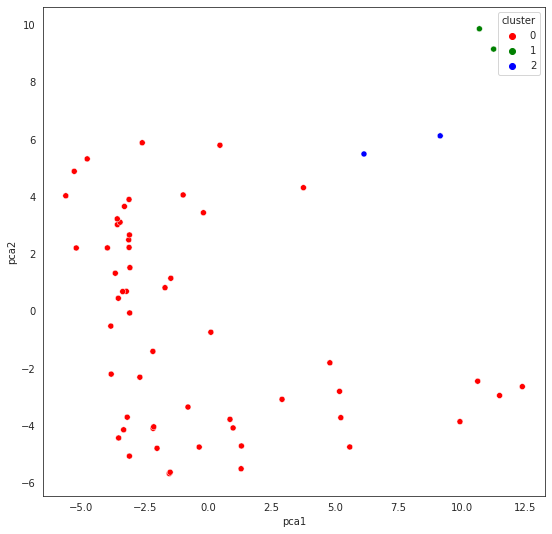

In [ ]:
#affichage du data
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(terrorism)
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df[(pca_df['pca2'] < 40) & (pca_df['pca1'] < 50)], palette = ['red','green','blue'])
